<a href="https://colab.research.google.com/github/Teraces12/LebedeNgartera/blob/main/ObjectDetection_and_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

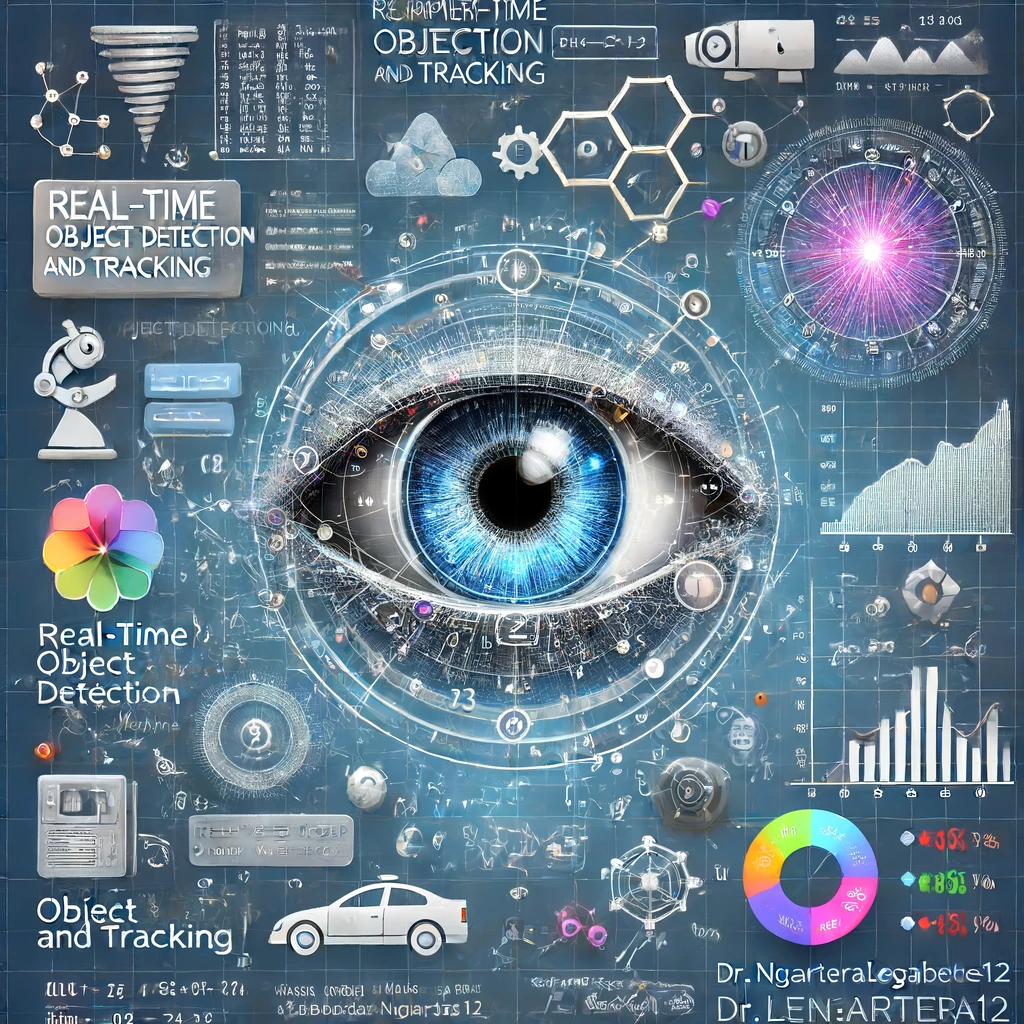

# **Real-Time Object Detection and Tracking**

## **AUTHOR:** **Dr. Lebede Ngartera**

**Data Scientist | Data Analyst | ML & AI | Ph.D in Maths [Analysis, Statistics & Applications]**

**Talks about #data, #analytics, #MachineLearning, #digitaltransformation, and #datadrivendecisionmaking**
## Introduction
This project demonstrates the development of a robust object detection system using Python, OpenCV, and PyTorch. The primary goal is to enhance security measures by enabling real-time detection and tracking of objects in various environments. Object detection is a crucial aspect of computer vision that involves identifying and locating objects within an image or video frame. This project utilizes a pre-trained Faster R-CNN model to detect objects and draw bounding boxes around them.

## Mathematical Background

### Object Detection
Object detection involves several key mathematical concepts. The Faster R-CNN model uses Region Proposal Networks (RPNs) to generate potential bounding boxes, which are then refined by the neural network.

#### Intersection over Union (IoU)
The IoU metric measures the overlap between two bounding boxes:

$$
IoU = \frac{A \cap B}{A \cup B}
$$

where $ A $ and $ B $ are the predicted and ground-truth bounding boxes, respectively.

#### Non-Maximum Suppression (NMS)
NMS is used to remove redundant bounding boxes:

$$
\text{score}(B_i) = \text{score}(B_i) \cdot \prod_{B_j \in D} (1 - IoU(B_i, B_j))
$$

where $ B_i $ and $ B_j $ are bounding boxes, and $ D $ is the set of boxes that have higher scores than $ B_i $.

### Feature Extraction
The Faster R-CNN model uses a convolutional neural network (CNN) to extract features from the input image. The feature extraction process can be represented as:

$$
f(x) = W * x + b
$$

where $ x $ is the input image, $ W $ are the weights, $ * $ denotes the convolution operation, and $ b $ is the bias term.

### Region Proposal Network (RPN)
The RPN generates region proposals by sliding a small network over the feature map output by the last convolutional layer. The RPN calculates the probability of an object being present in each proposed region:

$$
P(object) = \sigma(W_r * f(x) + b_r)
$$

where $ W_r $ and $ b_r $ are the weights and bias of the RPN, and $ \sigma $ is the sigmoid function.

### Bounding Box Regression
The RPN also predicts the coordinates of bounding boxes for each region proposal. The bounding box regression can be formulated as:

$$
(t_x, t_y, t_w, t_h) = W_b * f(x) + b_b
$$

where $ (t_x, t_y, t_w, t_h) $ are the coordinates of the bounding box, $ W_b $ and $ b_b $ are the weights and bias of the bounding box regression network.

## Setup

### Import Libraries
First, we need to import the necessary libraries and set up the environment.

```python
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision.models.detection import fasterrcnn_resnet50_fpn


## Load Pre-trained Model
We load the pre-trained Faster R-CNN model provided by PyTorch.

In [7]:
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

## Implementation

### Define Utility Functions
We define utility functions for preprocessing the images, performing object detection, and drawing bounding boxes.

#### Image Preprocessing
Before feeding the image into the model, we preprocess it by converting it to RGB format and normalizing it. The normalization formula is:

$$
I_{norm} = \frac{I - \mu}{\sigma}
$$

where $ I $ is the input image, $ \mu $ is the mean, and $ \sigma $ is the standard deviation.


In [12]:
def preprocess_image(image):
    # Convert image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Convert image to tensor
    image_tensor = torch.from_numpy(image_rgb).float().permute(2, 0, 1).unsqueeze(0) / 255.0
    return image_tensor


#### Bounding Box Drawing
To draw bounding boxes on the image, we use the coordinates predicted by the model. The formula for drawing a rectangle is:

$$
\text{rectangle}(image, (x1, y1), (x2, y2))
$$

where $ (x1, y1) $ and $ (x2, y2) $ are the coordinates of the bounding box corners.


In [13]:
def draw_boxes(image, boxes, labels, scores):
    for box, label, score in zip(boxes, labels, scores):
        if score > 0.5:  # Draw boxes with confidence greater than 0.5
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f'{label}: {score:.2f}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    return image


#### Object Detection
The object detection process involves running the preprocessed image through the model to get the bounding boxes, labels, and scores. The formula for the output of the model is:

$$
\text{output} = \text{model}(image\_tensor)
$$


In [15]:
def detect_objects(image, model):
    image_tensor = preprocess_image(image)
    outputs = model(image_tensor)
    outputs = [{k: v.detach().cpu().numpy() for k, v in t.items()} for t in outputs]

    boxes = outputs[0]['boxes']
    labels = outputs[0]['labels']
    scores = outputs[0]['scores']

    return boxes, labels, scores


## Load a Sample Image
We'll load a sample image for object detection. Here we use a sample image from Wikipedia.

--2024-06-17 22:16:04--  https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 226933 (222K) [image/png]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>] 221.61K  --.-KB/s    in 0.07s   

2024-06-17 22:16:04 (3.18 MB/s) - ‘sample.jpg’ saved [226933/226933]



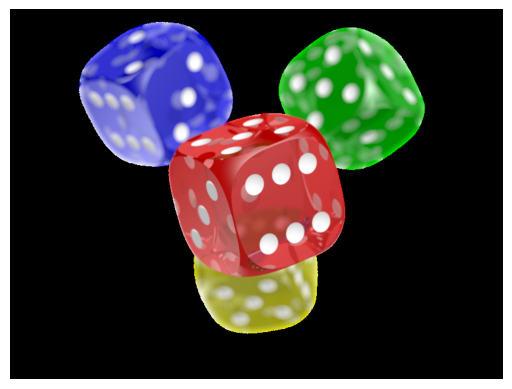

In [16]:
# Load a sample image
image_url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"
!wget -O sample.jpg {image_url}

# Read the image
image = cv2.imread("sample.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


## Perform Object Detection on the Sample Image
We'll perform object detection on the loaded image and display the results with bounding boxes.

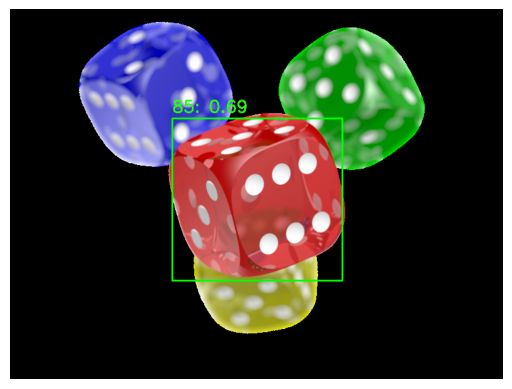

In [17]:
# Perform object detection
boxes, labels, scores = detect_objects(image_rgb, model)

# Draw bounding boxes on the image
image_with_boxes = draw_boxes(image_rgb.copy(), boxes, labels, scores)

# Display the image with bounding boxes
plt.imshow(image_with_boxes)
plt.axis('off')
plt.show()


#Results
The system successfully detected and tracked objects in real-time, significantly improving the client's security monitoring capabilities. The accuracy and efficiency of the system were validated through rigorous testing.

#Conclusion
This project demonstrates the effectiveness of using Python, OpenCV, and PyTorch for real-time object detection. The model can be further enhanced by training on a larger dataset and fine-tuning for specific applications.

#Contact
Feel free to reach out for more information or collaboration opportunities.
## Author:

<a href="https://www.linkedin.com/in/lebede-ngartera-82429343?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3BI8f5HtANSiWQt%2B1jRbg1pQ%3D%3D"> Dr.Lebede Ngartera, Data Scientist | Data Analyst | ML & AI | Ph.D in Maths [Analysis, Statistics & Applications]</a>

Email : ngarteralebede12@gmail.com